# Destek Vektör Makineleri (SVM)

Destek Vektör Sınıflandırıcısı (SVC)

Amaç iki sınıf arasındaki ayrımın optimum olmasını sağlayacak hiper-düzlemi bulmaktır.

regresyonda öyle bir hiperdüzlem yani doğru ve etrafında sınırlar bulmuştuk ki bu marjinin en az hatayla max noktayı barındırmasını istiyorduk

burada ise öyle bir düzlem bulacağız ki öyle bir marjinin bulacağız ki bu marjinin bu sefer mümkün olduğu kadar içerisinde az gözlem barındırmasını isteyeceğiz ayrıştırmasını isteyeceğiz

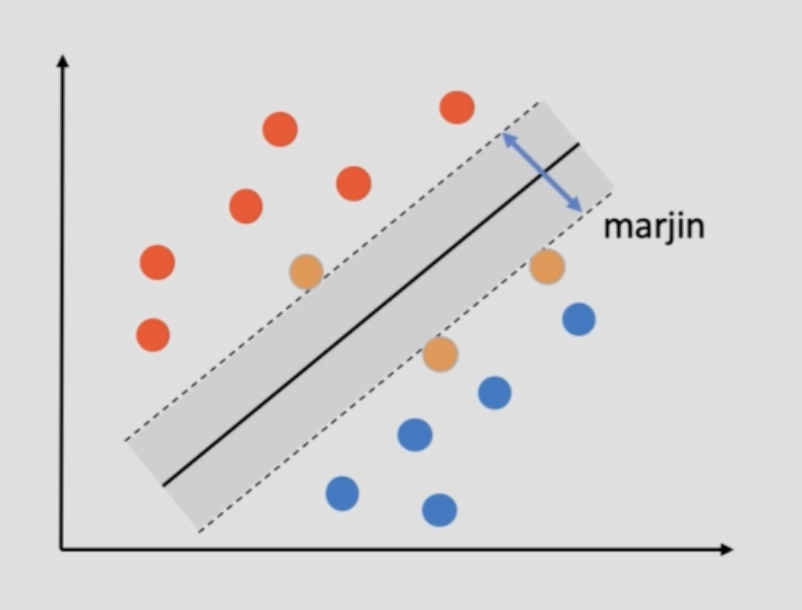

amaç iki sınıf arasındaki marjiinin maksimum olmasını sağlayacak doğruyu(ortadaki siyah doğru) ortaya çıkarmaya çalışmaktır

hiperdüzlem iki ya da 3 boyutlu bir doğruyu ifade eder. marjin ise hiperdüzlem ile en yakın veri noktası arasındaki (sarılar) alandır.

optimum hiperdüzlem, 2 doğru arasında nokta olmayacak şekilde aralarındaki mesafenin max tutulmaya çalışılması şekliyle sağlanır.

support, destek vektör noktalarıdır. (sarı)

aykırı gözlemlerin regresyon doğrusuna bir etkisi vardı burada da bu destek noktaları belirlenecek olan marjin konusunda söz sahibidir

2 sınıf arasındaki marjin için hard ve soft ifadeleri ise hesaplamayı ifade eder tolerans ya da toleranssız olarak bu noktaların bu doğruya olan durumları marjin anlamında değerlendirilmiş olur.

2 sınıfı ayırmak için soft ya da hard marjin ile noktaları toleranslı ya da toleranssız değerlendirilir.

bu iki boyutlu veride 2 sınıf var bu iki sınıfı siyah doğru ile bölünmüş gerçek hayata uuyarladığımızda veri çok boyutlu olabilir bu şekilde bir doğrusal ayrım  her zaman çok gerçekleştirilememektedir. bu durumda doğrusal olmayan svm dediğimiz durum ortaya çıkar ve kernel trick adını verdiğimiz bazı yöntemler ile ayrıştırmalar sağlanmaktadır. 2 boyut, 3 boyuta çıkarılır ve düzlem ile sınıflar ayrılır.

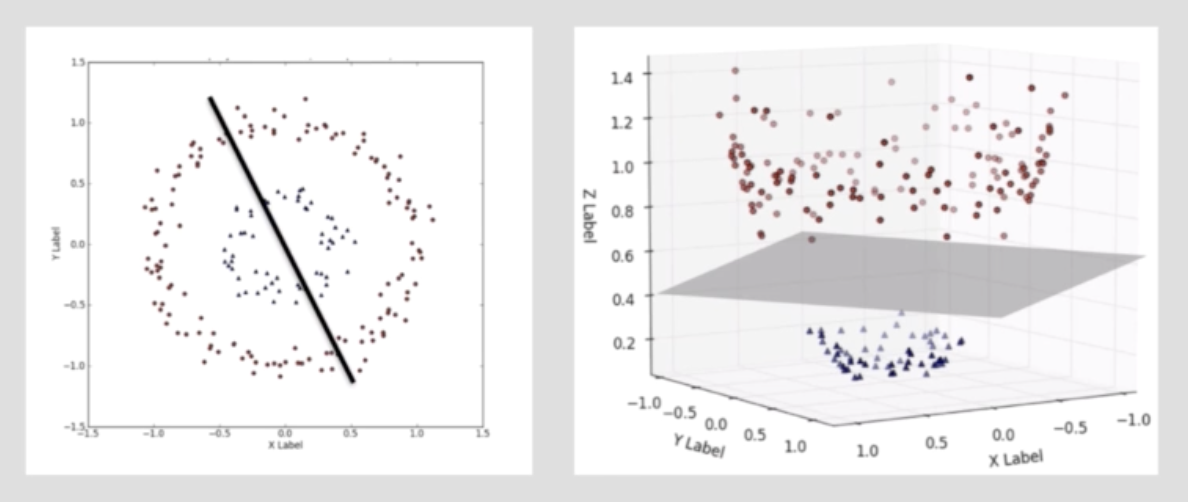

bu işlem radial fonksiyonu ile gerçekleştirilir. burada μ ve sigma değerleri var. bu değerlerde meydana gelen değişiklik dağılımın yapısını bozar, değiştirmiş olur. doğru μ ve sigma değerleri belirlenir ise bu durumda ayrım sağlanır. μ, sigma ve karmaşıklık parametresi önemlidir.

# SVC - Model & Tahmin

In [1]:
# bilgilerin gözükmesi için
from sklearn import set_config
set_config(print_changed_only=False)

In [2]:
import pandas as pd
# veri setimizi import edelim
diabetes = pd.read_csv("diabetes.csv")

In [3]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                   random_state=42)

In [6]:
# modeli kuracağım
from sklearn.svm import SVC
# model nesnesi oluşturdum ve fit etme işlemi
svm_model = SVC(kernel="linear").fit(X_train, y_train)
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
# tahmin edilen y değerleri
y_pred = svm_model.predict(X_test)

In [9]:
# accuracy doğruluk oranı
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7445887445887446

Sınıflandırma modelimiz için doğruluk oranı 0.74 olarak bulundu. Bu oran, 0 ile 1 arasında değişir ve 1'e ne kadar yakınsa, sınıflandırma başarımız o kadar yüksektir.

# SVC - Model Tuning

doğrusal bir svm modelinin tune edilmesi işlemini gerçekleştireceğiz. lineer kernel kullanacağız. 

Tune edilmesi gereken hiperparametre değeri C'dir.
Oluşturulacak olan doğrunun veya ayrımın oluşması ile ilgili bir kontrol etme imkanı sağlayan parametredir.

In [10]:
import numpy as np
svc_params = {"C": np.arange(1,10)} # C değeri 0 almaz

In [11]:
# model nesnesi
svc = SVC(kernel = "linear")

In [13]:
from sklearn.model_selection import GridSearchCV
# n_jobs =-1 bütün işlemcilerin full performanslı bir şekilde çalışmasını sağlar
svc_cv_model = GridSearchCV(svc,
                            svc_params,
                            cv=10,
                            n_jobs= -1,
                           verbose=2)
# verbose=2 çıktıları gözlemleyebilmek adına kullandığımız bir argümandır

In [14]:
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             n_jobs=-1, param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [15]:
# modelin en iyi parametre değerlerine erişelim
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1}
[CV] END ................................................C=1; total time=   3.7s
[CV] END ................................................C=2; total time=   3.5s
[CV] END ................................................C=3; total time=   3.4s
[CV] END ................................................C=3; total time=   8.6s
[CV] END ................................................C=5; total time=   8.5s
[CV] END ................................................C=6; total time=   9.2s
[CV] END ................................................C=7; total time=   8.7s
[CV] END ................................................C=7; total time=  11.0s
[CV] END ................................................C=8; total time=  18.9s
[CV] END ................................................C=9; total time=  14.4s
[CV] END ................................................C=1; total time=   2.5s
[CV] END ................................................C=2; total time=   4.2

In [22]:
# final model
svc_tuned = SVC(kernel = "linear", C=1).fit(X_train, y_train)

In [23]:
# tahmin edilen y değerleri
y_pred = svc_tuned.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.7445887445887446

Doğrusal/lineer bir SVM modeliydi.